In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:


titanic = sns.load_dataset("titanic")

print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [24]:
df_pclass = titanic.groupby("pclass").agg({"survived": "mean", "fare": "mean"}).reset_index()
df_pclass



,pclass,survived,fare
0,1,0.629630,84.154687
1,2,0.472826,20.662183
2,3,0.242363,13.675550


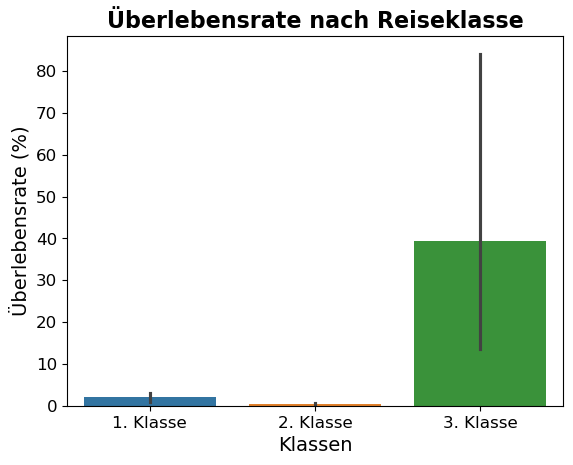

In [25]:
sns.barplot(df_pclass)
plt.title("Überlebensrate nach Reiseklasse", fontsize=16, weight="bold")
plt.xlabel("Klassen", fontsize=14)
plt.ylabel("Überlebensrate (%)", fontsize=14)


plt.xticks(ticks=[0, 1, 2], labels=["1. Klasse", "2. Klasse", "3. Klasse"], fontsize=12)


plt.yticks(fontsize=12)


plt.show()

In [26]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
titanic['age_group'] = pd.cut(titanic['age'], bins=bins, labels=labels)


df_age = titanic.groupby("age_group").agg({"survived": "mean", "fare": "mean"}).reset_index()
df_age

C:\Users\Admin\AppData\Local\Temp\ipykernel_14672\3197850499.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age = titanic.groupby("age_group").agg({"survived": "mean", "fare": "mean"}).reset_index()


,age_group,survived,fare
0,0-10,0.593750,30.434439
1,10-20,0.382609,29.529531
2,20-30,0.365217,28.306719
3,30-40,0.445161,42.496100
4,40-50,0.383721,41.163181
5,50-60,0.404762,44.774802
6,60-70,0.235294,45.910782
7,70-80,0.200000,25.936680


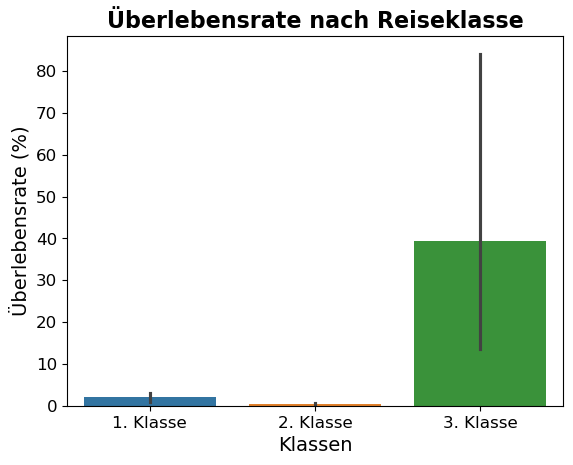

In [27]:
sns.barplot(df_pclass)
plt.title("Überlebensrate nach Reiseklasse", fontsize=16, weight="bold")
plt.xlabel("Klassen", fontsize=14)
plt.ylabel("Überlebensrate (%)", fontsize=14)


plt.xticks(ticks=[0, 1, 2], labels=["1. Klasse", "2. Klasse", "3. Klasse"], fontsize=12)


plt.yticks(fontsize=12)


plt.show()

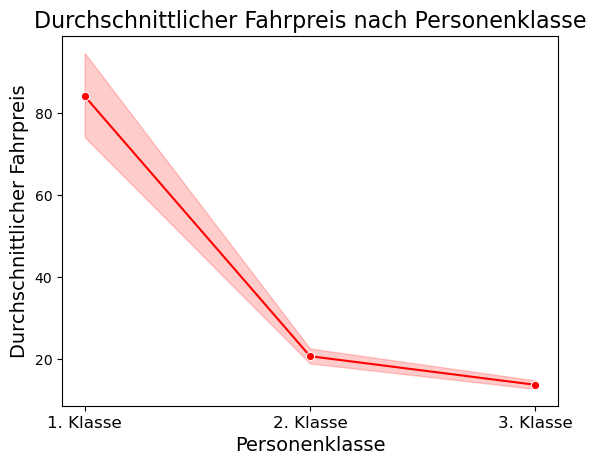

In [28]:
sns.lineplot(x="pclass", y="fare", data=titanic, color="red", marker="o")


plt.xticks(ticks=[1, 2, 3], labels=["1. Klasse", "2. Klasse", "3. Klasse"], fontsize=12)


plt.xlabel("Personenklasse", fontsize=14)
plt.ylabel("Durchschnittlicher Fahrpreis", fontsize=14)
plt.title("Durchschnittlicher Fahrpreis nach Personenklasse", fontsize=16)


plt.show()

In [29]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
titanic['age_group'] = pd.cut(titanic['age'], bins=bins, labels=labels)

# Aggregation: Überlebensrate und durchschnittlicher Fahrpreis nach Altersgruppe
df_age = titanic.groupby("age_group").agg({"survived": "mean", "fare": "mean"}).reset_index()

# Bedingte Formatierung
df_age.style.background_gradient(cmap='coolwarm')

C:\Users\Admin\AppData\Local\Temp\ipykernel_14672\3423198967.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age = titanic.groupby("age_group").agg({"survived": "mean", "fare": "mean"}).reset_index()


,age_group,survived,fare
0,0-10,0.593750,30.434439
1,10-20,0.382609,29.529531
2,20-30,0.365217,28.306719
3,30-40,0.445161,42.496100
4,40-50,0.383721,41.163181
5,50-60,0.404762,44.774802
6,60-70,0.235294,45.910782
7,70-80,0.200000,25.936680


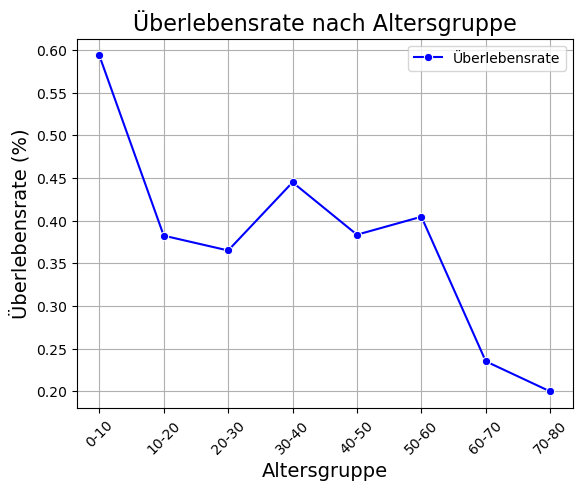

In [30]:
#Überlebensrate nach Alter Diagramm: 
sns.lineplot(x="age_group", y="survived", data=df_age, color="blue", marker="o", label="Überlebensrate")
plt.xlabel("Altersgruppe", fontsize=14)
plt.ylabel("Überlebensrate (%)", fontsize=14)
plt.title("Überlebensrate nach Altersgruppe", fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

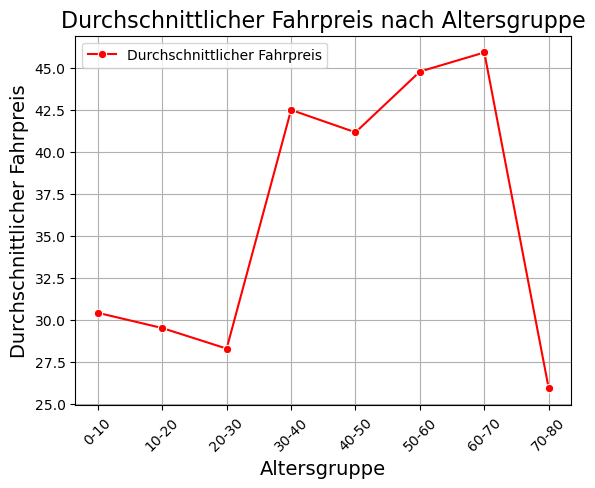

In [31]:
#Fahrpreis nach Alter Diagramm: 
sns.lineplot(x="age_group", y="fare", data=df_age, color="red", marker="o", label="Durchschnittlicher Fahrpreis")
plt.xlabel("Altersgruppe", fontsize=14)
plt.ylabel("Durchschnittlicher Fahrpreis", fontsize=14)
plt.title("Durchschnittlicher Fahrpreis nach Altersgruppe", fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [32]:
#Tabelle Abfahrtshafen: 
df_embarked = titanic.groupby("embark_town").agg({"survived": "mean", "fare": "mean"}).reset_index()


df_embarked.style.background_gradient(cmap='coolwarm')

,embark_town,survived,fare
0,Cherbourg,0.553571,59.954144
1,Queenstown,0.389610,13.276030
2,Southampton,0.336957,27.079812


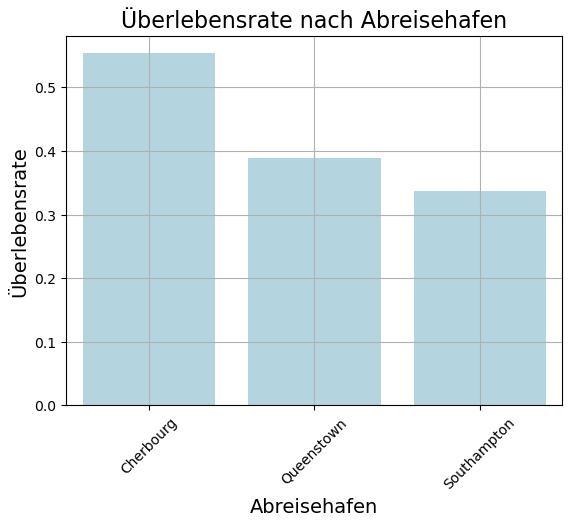

In [33]:
#Diagramm Überlebensrate nach Abfahrtshafen: 
sns.barplot(x="embark_town", y="survived", data=df_embarked, color="lightblue")
plt.xlabel("Abreisehafen", fontsize=14)
plt.ylabel("Überlebensrate", fontsize=14)
plt.title("Überlebensrate nach Abreisehafen", fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

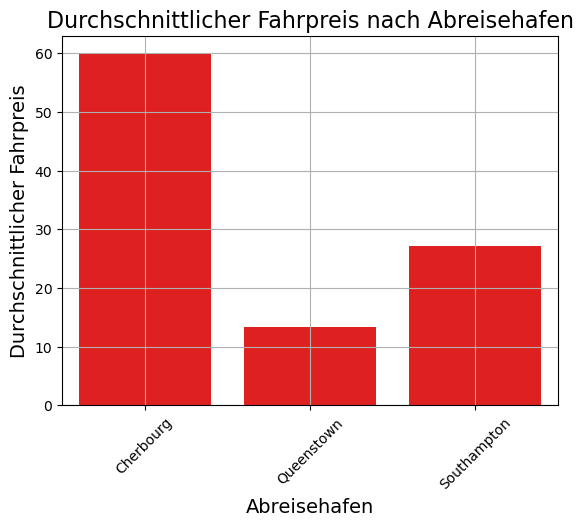

In [34]:
#Diagramm Fahrpreis nach Abfahrtshafen: 
sns.barplot(x="embark_town", y="fare", data=df_embarked, color="red")
plt.xlabel("Abreisehafen", fontsize=14)
plt.ylabel("Durchschnittlicher Fahrpreis", fontsize=14)
plt.title("Durchschnittlicher Fahrpreis nach Abreisehafen", fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [36]:
titanic["family_size"] = 1 + titanic["sibsp"] + titanic["parch"]
df_family_size = titanic.groupby("family_size").agg({"survived": "mean", "fare": "mean"}).reset_index()
df_family_size["survived"] = df_family_size["survived"] * 100
df_family_size

,family_size,survived,fare
0,1,30.353818,21.242689
1,2,55.279503,49.894129
2,3,57.843137,39.692482
3,4,72.413793,54.864510
4,5,20.000000,58.094453
5,6,13.636364,73.722727
6,7,33.333333,29.366667
7,8,0.000000,46.900000
8,11,0.000000,69.550000


Die Analyse des Titanic-Datensatzes liefert interessante Einblicke in die Überlebensraten und Fahrpreise der Passagiere in Abhängigkeit von verschiedenen Faktoren. Die Untersuchung konzentrierte sich auf fünf Hauptvariablen: Personenklasse (Pclass), Geschlecht (Sex), Alter (Age), Abreisehafen (Embarked) und Familiengröße (Family Size).
Personenklasse zeigt deutliche Unterschiede in der Überlebensrate und dem durchschnittlichen Fahrpreis. Passagiere der 1. Klasse hatten eine signifikant höhere Überlebensrate im Vergleich zu denen der 2. und 3. Klasse. Dies reflektiert wahrscheinlich die privilegierte Position der 1.-Klassen-Passagiere, die besseren Zugang zu Rettungsbooten und höhere Komfortstandards genossen. Der durchschnittliche Fahrpreis ist in der 1. Klasse deutlich höher, was die luxuriösen Bedingungen dieser Klasse widerspiegelt.
Beim Geschlecht zeigen die Daten, dass Frauen eine höhere Überlebensrate hatten als Männer. Dies spiegelt historische Berichte wider, wonach Frauen und Kinder bei der Evakuierung bevorzugt behandelt wurden. Die Unterschiede im durchschnittlichen Fahrpreis zwischen den Geschlechtern sind weniger ausgeprägt, was darauf hinweist, dass Preisunterschiede eher durch andere Faktoren wie Buchungsklasse und Reisezweck beeinflusst wurden.
Die Analyse des Alters zeigt, dass jüngere Passagiere tendenziell höhere Überlebensraten aufweisen. Kinder und junge Erwachsene hatten im Vergleich zu älteren Passagieren eine bessere Überlebenschance, möglicherweise aufgrund von Faktoren wie körperlicher Fitness und schnellerem Zugang zu Rettungsbooten. Die durchschnittlichen Fahrpreise variieren je nach Altersgruppe, was durch unterschiedliche Buchungsklassen und Reisebedingungen erklärt werden kann.
Der Abreisehafen beeinflusst sowohl die Überlebensrate als auch den Fahrpreis. Unterschiede in den Überlebensraten zwischen den Abreisehäfen könnten durch unterschiedliche Rettungsprotokolle oder die Verteilung der Passagiere erklärt werden. Auch die Fahrpreise variieren, möglicherweise aufgrund der Verfügbarkeit und der Nachfrage an den verschiedenen Abreiseorten.
Die Familiengröße zeigt interessante Muster: Passagiere, die alleine reisten, hatten möglicherweise unterschiedliche Überlebenschancen im Vergleich zu Familienreisenden. Größere Familien könnten mit unterschiedlichen Herausforderungen bei der Evakuierung konfrontiert gewesen sein, was sich auf die Überlebensrate ausgewirkt haben könnte. Der durchschnittliche Fahrpreis steigt tendenziell mit der Familiengröße, da größere Gruppen oft mehr für ihre Plätze gezahlt haben.
Zusammenfassend bieten die Daten eine wertvolle Perspektive auf die sozialen und ökonomischen Unterschiede unter den Passagieren der Titanic. Diese Erkenntnisse helfen nicht nur, die historische Katastrophe besser zu verstehen, sondern zeigen auch, wie verschiedene Faktoren das Überleben und die Kosten der Reise beeinflussten. Die Ergebnisse reflektieren sowohl die damaligen gesellschaftlichen Bedingungen als auch die komplexen Herausforderungen, denen die Passagiere gegenüberstanden.







